In [2]:
pip install --upgrade numpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


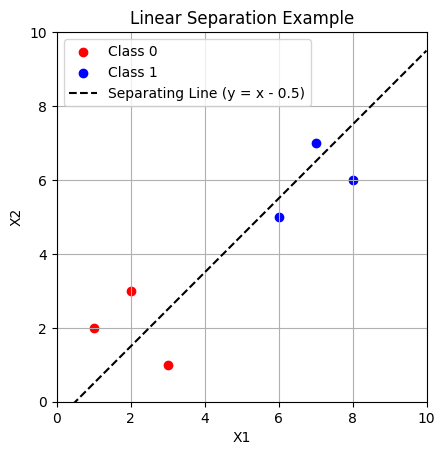

In [3]:

import numpy as np
import matplotlib.pyplot as plt
# Define simple 2D data points
# Class 0 (Red)
class0 = np.array([[1, 2], [2, 3], [3, 1]])
# Class 1 (Blue)
class1 = np.array([[6, 5], [7, 7], [8, 6]])
# Plot data points
plt.scatter(class0[:, 0], class0[:, 1], color='red', label='Class 0')
plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Class 1')
# Draw a simple separating line (manually chosen)
# Line: y = x - 0.5
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals - 0.5
plt.plot(x_vals, y_vals, 'k--', label='Separating Line (y = x - 0.5)')
# Graph settings
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Linear Separation Example")
plt.legend()
plt.grid(True)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

############################################################################################################################################################


practical 7b

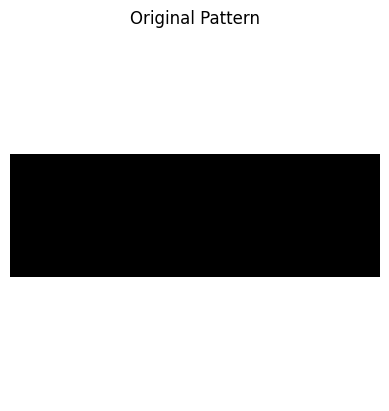

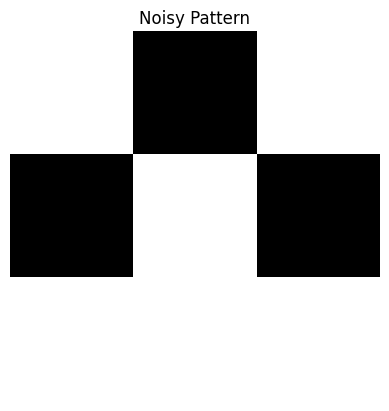

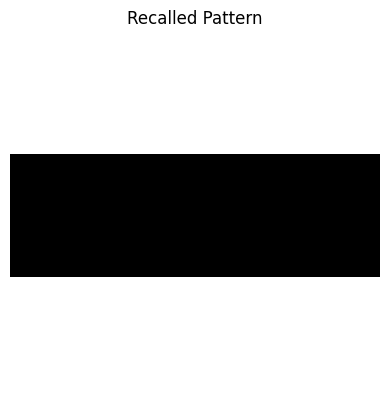

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# Function to display 3x3 pattern
def show(pattern, title):
    plt.imshow(pattern.reshape(3, 3), cmap='gray', vmin=-1, vmax=1)
    plt.title(title)
    plt.axis('off')
    plt.show()
# Step 1: Define original pattern (3x3 image)
# Using -1 and 1 instead of 0 and 1
original_pattern = np.array([
1, 1, 1,
-1, -1, -1,
1, 1, 1
])
# Show original
show(original_pattern, "Original Pattern")
# Step 2: Train Hopfield network (Hebbian learning)
# Create weight matrix
size = len(original_pattern)
weights = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        if i != j:
            weights[i][j] = original_pattern[i] * original_pattern[j]
# Step 3: Add noise (flip some values)
noisy_pattern = original_pattern.copy()
noisy_pattern[1] *= -1 # Flip a bit
noisy_pattern[4] *= -1 # Flip another bit
# Show noisy pattern
show(noisy_pattern, "Noisy Pattern")
# Step 4: Recall from noisy input
# Update one by one (synchronous update)
recalled_pattern = noisy_pattern.copy()
for i in range(size):
    raw = np.dot(weights[i], recalled_pattern)
    recalled_pattern[i] = 1 if raw >= 0 else -1
# Show recalled pattern
show(recalled_pattern, "Recalled Pattern")

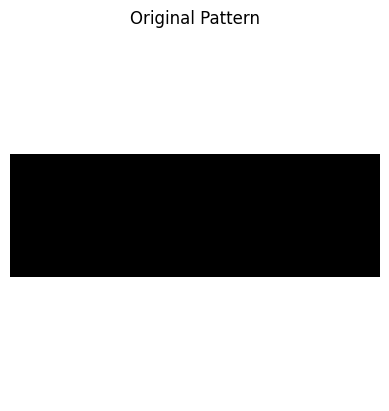

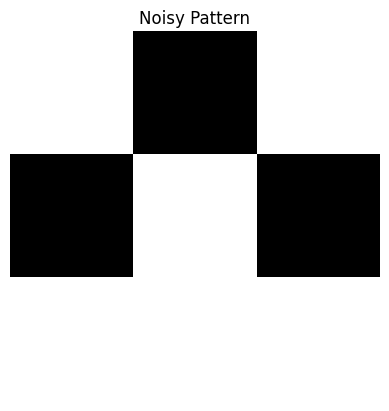

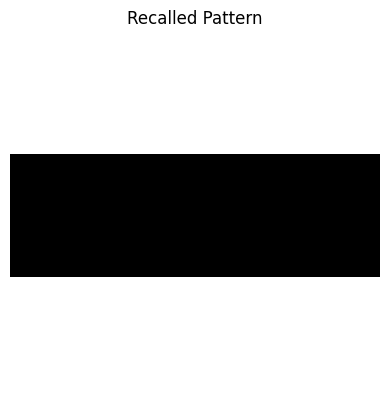

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to display 3x3 pattern
def show(pattern, title):
    plt.imshow(pattern.reshape(3, 3), cmap='gray', vmin=-1, vmax=1)  # reshape to 3x3 image
    plt.title(title)                                                 # set title
    plt.axis('off')                                                  # hide axis
    plt.show()                                                       # display

# -------------------- Step 1: Original Pattern --------------------
# Representing image using +1 and -1 (Hopfield uses bipolar values)
original_pattern = np.array([
     1,  1,  1,
    -1, -1, -1,
     1,  1,  1
])

show(original_pattern, "Original Pattern")

# -------------------- Step 2: Train Hopfield Network (Hebbian Rule) --------------------
size = len(original_pattern)                # total neurons = 9
weights = np.zeros((size, size))            # initialize 9x9 weight matrix

for i in range(size):
    for j in range(size):
        if i != j:                          # no self-connection (diagonal = 0)
            weights[i][j] = original_pattern[i] * original_pattern[j]  # Hebbian learning

# -------------------- Step 3: Create Noisy Pattern --------------------
noisy_pattern = original_pattern.copy()
noisy_pattern[1] *= -1       # flip bit at index 1
noisy_pattern[4] *= -1       # flip bit at index 4

show(noisy_pattern, "Noisy Pattern")

# -------------------- Step 4: Recall / Retrieve Original Pattern --------------------
recalled_pattern = noisy_pattern.copy()

for i in range(size):
    raw = np.dot(weights[i], recalled_pattern)   # compute net input
    recalled_pattern[i] = 1 if raw >= 0 else -1  # apply sign activation

show(recalled_pattern, "Recalled Pattern")
